# Statistics Challenge (Optional)

Use the `orders.csv` dataset in the same directory to complete this challenge.

**Background**:

There are exactly 100 sneaker shops on a sneaker retailing website, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

**Questions**:

- What went wrong with this metric (AOV) and the current analysis in general. Support your answers with appropriate visualizations.

- Propose a new metric that better represents the behavior of the stores' customers. Why are these metrics better and what are their values?

- Using the `created_at` column as a proxy for the date and time of order creation, provide a brief analysis of the trends in the customers' purchasing behavior.

Show all of your work in this notebook.

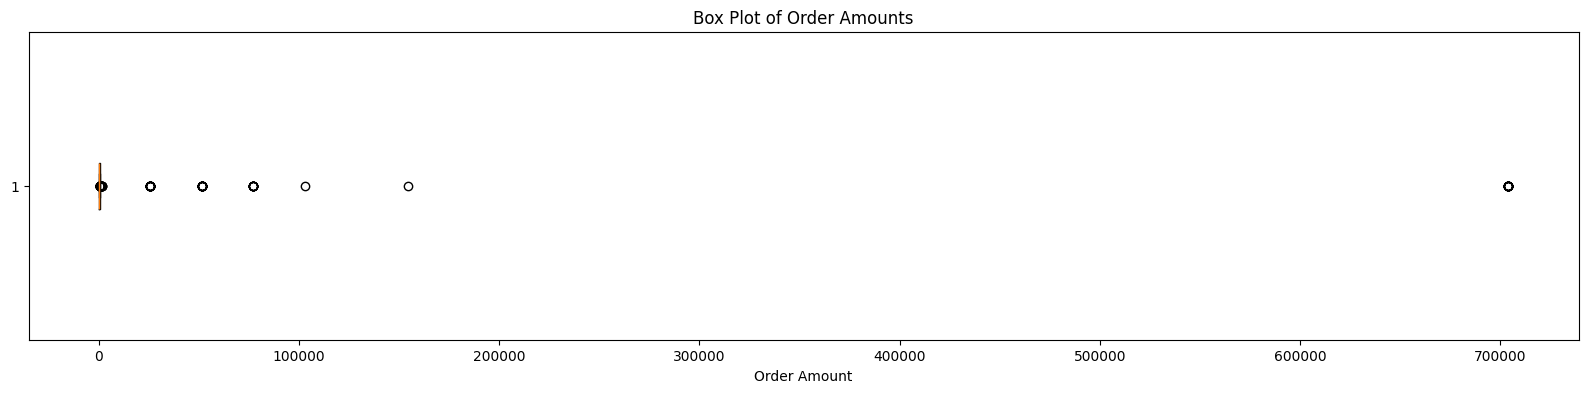

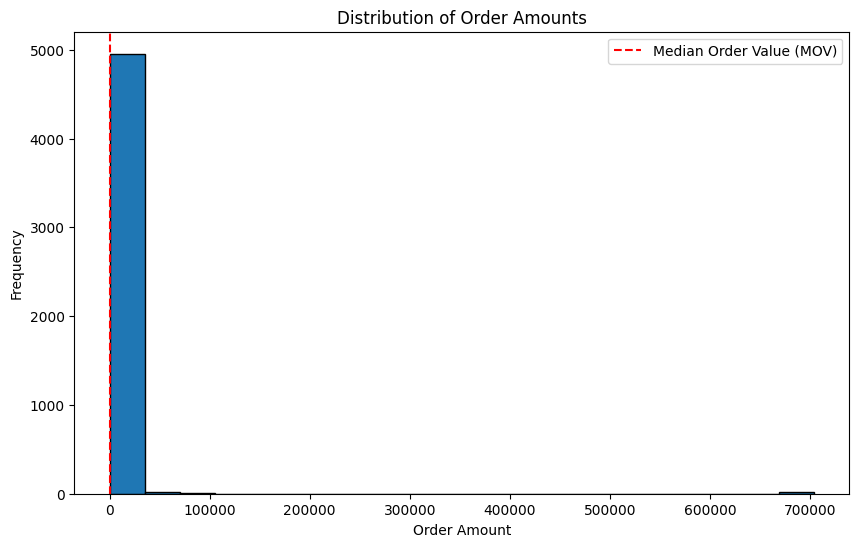

       count         mean           std   min    25%    50%    75%       max
days                                                                        
1     2496.0  2854.076122  39979.475454  90.0  161.0  280.0  387.0  704000.0
2     2504.0  3435.250000  42547.754529  90.0  164.0  292.0  393.0  704000.0
day_value
1     359
2     351
3     324
4     313
5     320
6     277
7     378
8     287
9     419
10    319
11    344
12    328
13    332
14    295
15    268
16    285
17    384
18    374
19    294
20    313
21    340
22    341
23    329
24    322
25    330
26    353
27    354
28    354
29    323
30    326
Name: total_items, dtype: int64
day_value
1      359
2     4351
3      324
4     2313
5      320
6      277
7     4378
8      287
9      419
10     319
11    2344
12    2328
13     332
14     295
15    2268
16     285
17    2384
18     374
19    2294
20     313
21     340
22    2341
23     329
24    4322
25    2330
26     353
27     354
28    6354
29     323
30     326
Name: tota

In [31]:
import csv
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("../Statistics Focus/orders.csv")
plt.figure(figsize=(20, 4))
plt.boxplot(df['order_value'], vert=False)
plt.title('Box Plot of Order Amounts')
plt.xlabel('Order Amount')
plt.show()
mov = df['order_value'].median()

# Print and compare AOV and MOV
print(f'AOV: ${df["order_value"].mean():,.2f}')
print(f'MOV: ${mov:,.2f}')

# Visualize the distribution of order amounts
plt.figure(figsize=(10, 6))
plt.hist(df['order_value'], bins=20, edgecolor='black')
plt.title('Distribution of Order Amounts')
plt.xlabel('Order Amount')
plt.ylabel('Frequency')
plt.axvline(x=mov, color='red', linestyle='--', label='Median Order Value (MOV)')
plt.legend()
plt.show()

# Question 3 part 1: Day or night

with open("../Statistics Focus/orders.csv") as file:
    csvreader = csv.reader(file)
    next(csvreader)
    hours = []
    for row in csvreader:
        day = row[6]
        #print(day)
        time = day.split()[1]
        hour = (time.split(':')[0])
        if int(hour) > 6 and int(hour) <= 18:
            val = 1
            hours.append(val)
        if int(hour) <= 6 or int(hour) > 18:
            val = 2
            hours.append(val)
    #print(hours)
    df['hours'] = hours
    x = df['hours']
    #print(x)
    y = df.groupby('hours')["order_value"].describe()
    #print(y)
    
    
 
        

 # Question 3: first part of end part of the month
with open("../Statistics Focus/orders.csv") as file:
    csvreader = csv.reader(file)
    next(csvreader)
    days = []
    for row in csvreader:
        day = row[6]
        #print(day)
        time = day.split()[0]
        day = (time.split('-')[2])
        #print(day)
        if int(day) <= 15:
            val = 1
            days.append(val)
        if int(day) > 15:
            val = 2
            days.append(val)
    #print(days)
    df['days'] = days
    x = df['days']
    y = df.groupby('days')["order_value"].describe()
    print(y)
# Question 3 part 3
with open("../Statistics Focus/orders.csv") as file:
    df['created_at'] = pd.to_datetime(df['created_at'])

# Extract day value
    df['day_value'] = df['created_at'].dt.day

# Filter rows where total_items is not over 100
    filtered_df = df[df['total_items'] <= 100]

# Group by 'day_value' and sum 'total_items'
    result = filtered_df.groupby('day_value')['total_items'].sum()
    print(result)
#Question 3 part 4
with open("../Statistics Focus/orders.csv") as file:
    df['created_at'] = pd.to_datetime(df['created_at'])
    df['day_value'] = df['created_at'].dt.day
    result = df.groupby('day_value')['total_items'].sum()
    print(result) 


To do list: Find average order of values when quantity is less than 5, find a way to present outliers and demonstrate in a graph, a bar char of the 2 values, with and without outliers. 

A new metric is the amount per shoe they spend, and then finding the average number of shoes they buy per trip, again substracting the outliers

Go over and find if created is before or after noon, 1 pm, 2pm, etc.